In [2]:
import pandas as pd
import pickle5 as pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Image Darkness Correlations w/ Catdef and Runoff
 - Provides an approximate representation of relationship between max snowpack and catdef/runoff
 - Calculation of the total darkness for the Landsat snowpack images in Feb (should approximate the inverse of snowpack)
 - Correlates Feb. snowpack image darkness with catdef and runoff measurements in following Apr.

## Read in Data

In [3]:
with open('all_data.pkl', 'rb') as f:
    data = pickle.load(f)

In [4]:
data.head()

,Year,Month,SCA,Landsat_Image,BW_SCA_Image,Color_SCA_Image,catdef,rzexc,evap,srfexc,sfmc,capac,Snowf,Rainf,prmc,sumwesn,runoff,Tair,RainfC,rzmc
0,2003,1,294585,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 38.347, 58.863, 72.956, 104.4...","[[nan, nan, nan, 2.8021, 3.8333, 3.6458, 2.835...","[[nan, nan, nan, 1.9842, 1.8075, 1.1867, 1.024...","[[nan, nan, nan, -0.25451, -0.26739, -0.30132,...","[[nan, nan, nan, 0.45009, 0.41456000000000004,...","[[nan, nan, nan, 0.07147200000000001, 0.069579...","[[nan, nan, nan, 0.0, 4.0366999999999995e-05, ...","[[nan, nan, nan, 9.8164, 9.1992, 7.3516, 5.421...","[[nan, nan, nan, 0.46491000000000005, 0.42658,...","[[nan, nan, nan, 1.9386e-05, 0.00053811, 0.009...","[[nan, nan, nan, 7.8125, 7.9023, 6.6211, 3.629...","[[nan, nan, nan, 284.14, 283.06, 281.55, 281.1...","[[nan, nan, nan, 0.12506, 0.12585, 0.10165, 0....","[[nan, nan, nan, 0.47278000000000003, 0.442019..."
1,2003,2,19185627,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 54.951, 79.32600000000001, 90...","[[nan, nan, nan, 1.7583, 1.871, 1.7959, 1.2065...","[[nan, nan, nan, 2.3223, 1.939, 1.5134, 1.5090...","[[nan, nan, nan, -0.48801000000000005, -0.486,...","[[nan, nan, nan, 0.43295, 0.39828, 0.36313, 0....","[[nan, nan, nan, 0.067444, 0.10471, 0.092987, ...","[[nan, nan, nan, 0.027298000000000003, 0.04013...","[[nan, nan, nan, 4.377, 4.3574, 3.7314, 2.8877...","[[nan, nan, nan, 0.45143, 0.40968999999999994,...","[[nan, nan, nan, 0.0026054000000000003, 0.0053...","[[nan, nan, nan, 3.4277, 3.8438, 3.5537, 2.386...","[[nan, nan, nan, 281.02, 279.66, 278.21, 278.1...","[[nan, nan, nan, 0.35803, 0.32971, 0.230590000...","[[nan, nan, nan, 0.45508000000000004, 0.42786,..."
2,2003,3,39522095,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 58.096000000000004, 80.846, 9...","[[nan, nan, nan, 3.0619, 3.3489999999999998, 2...","[[nan, nan, nan, 2.252, 2.0894, 1.7779, 1.9288...","[[nan, nan, nan, -0.28013000000000005, -0.2856...","[[nan, nan, nan, 0.43599, 0.40242, 0.365309999...","[[nan, nan, nan, 0.059937, 0.09848, 0.10797000...","[[nan, nan, nan, 0.00029898, 0.001753300000000...","[[nan, nan, nan, 8.875, 8.3047, 6.4688, 5.0547...","[[nan, nan, nan, 0.45028, 0.40975, 0.3652, 0.3...","[[nan, nan, nan, 1.5571999999999999e-06, 9.130...","[[nan, nan, nan, 5.7129, 5.6113, 4.375, 2.9229...","[[nan, nan, nan, 282.26, 281.13, 279.84, 279.9...","[[nan, nan, nan, 0.31006, 0.2572, 0.17047, 0.1...","[[nan, nan, nan, 0.4537, 0.42867, 0.38632, 0.3..."
3,2003,4,53739475,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 50.902, 74.34, 89.059, 98.902...","[[nan, nan, nan, 3.2247, 3.7618, 3.4259, 2.673...","[[nan, nan, nan, 2.4907, 2.2066, 2.021, 2.1504...","[[nan, nan, nan, -0.1607, -0.14800000000000002...","[[nan, nan, nan, 0.44292, 0.40849, 0.3726, 0.3...","[[nan, nan, nan, 0.079956, 0.12982, 0.19555999...","[[nan, nan, nan, 0.38354, 0.65161, 0.88013, 0....","[[nan, nan, nan, 8.6953, 8.5234, 7.334, 6.5078...","[[nan, nan, nan, 0.45588, 0.41511000000000003,...","[[nan, nan, nan, 0.074188, 0.14722000000000002...","[[nan, nan, nan, 6.0234, 6.3164, 5.4961, 4.298...","[[nan, nan, nan, 280.85, 279.66, 278.47, 278.7...","[[nan, nan, nan, 0.68433, 0.58594, 0.42126, 0....","[[nan, nan, nan, 0.46101000000000003, 0.43318,..."
4,2003,5,46363941,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 77.083, 103.3, 112.11, 113.8,...","[[nan, nan, nan, 0.016929, -0.53873, -0.45475,...","[

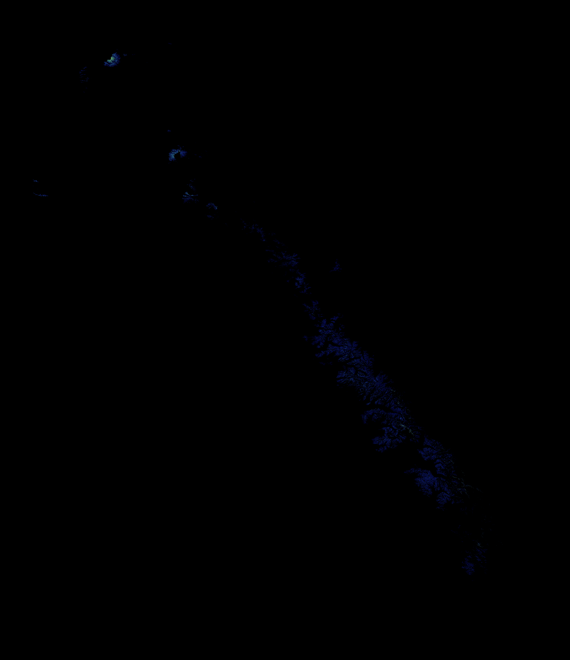

In [6]:
# take a look at an SCA Image
im = data['Color_SCA_Image'][10]
im

In [7]:
# get size of image (w * h)
pixels = im.getdata()

print("Total Image Pixels:")
print(im.width * im.height)

Total Image Pixels:
376200


In [8]:
# calculation of darkness of an image
pixels = im.getdata()

black_p = 0
all_p = 0
for p in pixels:
    all_p += 1
    if (p[0] == 0) and (p[1] == 0) and (p[1] == 0):
        black_p += 1
    
print('all_pixels:', str(all_p))
print('black_pixels:', str(black_p))

black_p/all_p

all_pixels: 376200
black_pixels: 368281


0.9789500265816056

## Create DF of feb snowpack images and april runoff/catdef

In [12]:
feb_snow = data[data['Month'] == 2][['Year', 'Month', 'Color_SCA_Image']].copy()
feb_snow.rename(columns={'Month':'Month_snowpack'}, inplace=True)
feb_snow

,Year,Month_snowpack,Color_SCA_Image
1,2003,2,<PIL.Image.Image image mode=RGBA size=570x660 ...
13,2004,2,<PIL.Image.Image image mode=RGBA size=570x660 ...
25,2005,2,<PIL.Image.Image image mode=RGBA size=570x660 ...
37,2006,2,<PIL.Image.Image image mode=RGBA size=570x660 ...
49,2007,2,<PIL.Image.Image image mode=RGBA size=570x660 ...
61,2008,2,<PIL.Image.Image image mode=RGBA size=570x660 ...
73,2009,2,<PIL.Image.Image image mode=RGBA size=570x660 ...
85,2010,2,<PIL.Image.Image image mode=RGBA size=570x660 ...
97,2011,2,<PIL.Image.Image image mode=RGBA size=570x660 ...
109,2012,2,<PIL.Image.Image image mode=RGBA size=570x660 ...


In [13]:
apr_cat_run = data[data['Month'] == 4][['Year', 'Month', 'catdef', 'runoff']].copy()
apr_cat_run                  

,Year,Month,catdef,runoff
3,2003,4,"[[nan, nan, nan, 50.902, 74.34, 89.059, 98.902...","[[nan, nan, nan, 6.0234, 6.3164, 5.4961, 4.298..."
15,2004,4,"[[nan, nan, nan, 92.164, 109.1, 119.04, 128.7,...","[[nan, nan, nan, 1.6362, 2.0127, 1.8403, 1.346..."
27,2005,4,"[[nan, nan, nan, 61.17, 81.014, 94.17, 104.51,...","[[nan, nan, nan, 3.8965, 4.3496, 3.7393, 2.958..."
39,2006,4,"[[nan, nan, nan, 50.04, 73.993, 86.618, 88.368...","[[nan, nan, nan, 3.8027, 4.127, 3.6484, 2.8584..."
51,2007,4,"[[nan, nan, nan, 93.52799999999999, 112.9, 122...","[[nan, nan, nan, 1.2744, 1.4707, 1.3877, 1.202..."
63,2008,4,"[[nan, nan, nan, 98.743, 113.46, 120.21, 125.0...","[[nan, nan, nan, 1.1187, 1.4194, 1.4517, 1.342..."
75,2009,4,"[[nan, nan, nan, 86.96600000000001, 110.75, 12...","[[nan, nan, nan, 1.2915, 1.4541, 1.3057, 1.142..."
87,2010,4,"[[nan, nan, nan, 63.35, 84.24, 96.022, 131.15,...","[[nan, nan, nan, 4.5469, 4.7871, 4.3672, 2.608..."
99,2011,4,"[[nan, nan, nan, 56.9, 73.916, 84.135, 86.572,...","[[nan, nan, nan, 3.792, 4.6953, 4.4844, 3.5361..."
111,2012,4,"[[nan, nan, nan, 38.797, 59.5, 72.953, 85.4220...","[[nan, nan, nan, 5.8438, 6.4121, 5.4219, 3.542..."


In [14]:
df = feb_snow.merge(apr_cat_run, on = 'Year')
df

,Year,Month_snowpack,Color_SCA_Image,Month,catdef,runoff
0,2003,2,<PIL.Image.Image image mode=RGBA size=570x660 ...,4,"[[nan, nan, nan, 50.902, 74.34, 89.059, 98.902...","[[nan, nan, nan, 6.0234, 6.3164, 5.4961, 4.298..."
1,2004,2,<PIL.Image.Image image mode=RGBA size=570x660 ...,4,"[[nan, nan, nan, 92.164, 109.1, 119.04, 128.7,...","[[nan, nan, nan, 1.6362, 2.0127, 1.8403, 1.346..."
2,2005,2,<PIL.Image.Image image mode=RGBA size=570x660 ...,4,"[[nan, nan, nan, 61.17, 81.014, 94.17, 104.51,...","[[nan, nan, nan, 3.8965, 4.3496, 3.7393, 2.958..."
3,2006,2,<PIL.Image.Image image mode=RGBA size=570x660 ...,4,"[[nan, nan, nan, 50.04, 73.993, 86.618, 88.368...","[[nan, nan, nan, 3.8027, 4.127, 3.6484, 2.8584..."
4,2007,2,<PIL.Image.Image image mode=RGBA size=570x660 ...,4,"[[nan, nan, nan, 93.52799999999999, 112.9, 122...","[[nan, nan, nan, 1.2744, 1.4707, 1.3877, 1.202..."
5,2008,2,<PIL.Image.Image image mode=RGBA size=570x660 ...,4,"[[nan, nan, nan, 98.743, 113.46, 120.21, 125.0...","[[nan, nan, nan, 1.1187, 1.4194, 1.4517, 1.342..."
6,2009,2,<PIL.Image.Image image mode=RGBA size=570x660 ...,4,"[[nan, nan, nan, 86.96600000000001, 110.75, 12...","[[nan, nan, nan, 1.2915, 1.4541, 1.3057, 1.142..."
7,2010,2,<PIL.Image.Image image mode=RGBA size=570x660 ...,4,"[[nan, nan, nan, 63.35, 84.24, 96.022, 131.15,...","[[nan, nan, nan, 4.5469, 4.7871, 4.3672, 2.608..."
8,2011,2,<PIL.Image.Image image mode=RGBA size=570x660 ...,4,"[[nan, nan, nan, 56.9, 73.916, 84.135, 86.572,...","[[nan, nan, nan, 3.792, 4.6953, 4.4844, 3.5361..."
9,2012,2,<PIL.Image.Image image mode=RGBA size=570x660 ...,4,"[[nan, nan, nan, 38.797, 59.5, 72.953, 85.4220...","[[nan, nan, nan, 5.8438, 6.4121, 5.4219, 3.542..."


### Calculate % Black in each snow image

In [19]:
# helper functions
##################
def black_pixels(image):
    pixels = image.getdata()

    black_p = 0
    all_p = 0
    for p in pixels:
        all_p += 1
        if (p[0] == 0) and (p[1] == 0) and (p[1] == 0):
            black_p += 1
            
    black_percentage = black_p / all_p
    return black_percentage

def shape_to_fit(x):
    # shape of catdef runoff is 
    s_array = np.full((33, 37), x)
    return s_array

def flatten_arr(x):
    return x.flatten()

def get_corrs(array_col, float_col):
    return_array = np.zeros(len(array_col[0]))
    for i in range(len(array_col[0])):
        x_series = np.array([x[i] for x in array_col])
        x_corr = np.corrcoef(x_series,df[float_col])[0][1]
        return_array[i] = x_corr
        
    return return_array

In [16]:
def shape_to_fit(x):
    # shape of catdef runoff is 
    s_array = np.full((33, 37), x)
    return s_array

In [17]:
def flatten_arr(x):
    return x.flatten()

In [18]:
def get_corrs(array_col, float_col):
    return_array = np.zeros(len(array_col[0]))
    for i in range(len(array_col[0])):
        x_series = np.array([x[i] for x in array_col])
        x_corr = np.corrcoef(x_series,df[float_col])[0][1]
        return_array[i] = x_corr
        
    return return_array

In [ ]:
#df['percent_image_black'] = df['Color_SCA_Image'].apply(black_pixels)

In [20]:
# calculte percent of image that is black pixels
df['percent_image_black'] = df['Color_SCA_Image'].apply(black_pixels)
# flatten catdef and runoff arrays
df['catdef_flat'] = df['catdef'].apply(flatten_arr)
df['runoff_flat'] = df['runoff'].apply(flatten_arr)
df.head()

,Year,Month_snowpack,Color_SCA_Image,Month,catdef,runoff,percent_image_black,catdef_flat,runoff_flat
0,2003,2,<PIL.Image.Image image mode=RGBA size=570x660 ...,4,"[[nan, nan, nan, 50.902, 74.34, 89.059, 98.902...","[[nan, nan, nan, 6.0234, 6.3164, 5.4961, 4.298...",0.875486,"[nan, nan, nan, 50.902, 74.34, 89.059, 98.902,...","[nan, nan, nan, 6.0234, 6.3164, 5.4961, 4.2988..."
1,2004,2,<PIL.Image.Image image mode=RGBA size=570x660 ...,4,"[[nan, nan, nan, 92.164, 109.1, 119.04, 128.7,...","[[nan, nan, nan, 1.6362, 2.0127, 1.8403, 1.346...",0.861653,"[nan, nan, nan, 92.164, 109.1, 119.04, 128.7, ...","[nan, nan, nan, 1.6362, 2.0127, 1.8403, 1.3467..."
2,2005,2,<PIL.Image.Image image mode=RGBA size=570x660 ...,4,"[[nan, nan, nan, 61.17, 81.014, 94.17, 104.51,...","[[nan, nan, nan, 3.8965, 4.3496, 3.7393, 2.958...",0.865954,"[nan, nan, nan, 61.17, 81.014, 94.17, 104.51, ...","[nan, nan, nan, 3.8965, 4.3496, 3.7393, 2.958,..."
3,2006,2,<PIL.Image.Image image mode=RGBA size=570x660 ...,4,"[[nan, nan, nan, 50.04, 73.993, 86.618, 88.368...","[[nan, nan, nan, 3.8027, 4.127, 3.6484, 2.8584...",0.892741,"[nan, nan, nan, 50.04, 73.993, 86.618, 88.368,...","[nan, nan, nan, 3.8027, 4.127, 3.6484, 2.8584,..."
4,2007,2,<PIL.Image.Image image mode=RGBA size=570x660 ...,4,"[[nan, nan, nan, 93.52799999999999, 112.9, 122...","[[nan, nan, nan, 1.2744, 1.4707, 1.3877, 1.202...",0.878206,"[nan, nan, nan, 93.52799999999999, 112.9, 122....","[nan, nan, nan, 1.2744, 1.4707, 1.3877, 1.2021..."


In [22]:
catdef_corr = get_corrs(df['catdef_flat'], 'percent_image_black')
print(len(catdef_corr))
catdef_corr = catdef_corr.reshape(33,37)
catdef_corr.shape

1221


(33, 37)

### Catdef Correlations Plot
 - Each gridpoint is a correlation between that point's april measurements for catdef, and feb measurements of % image that is black pixels

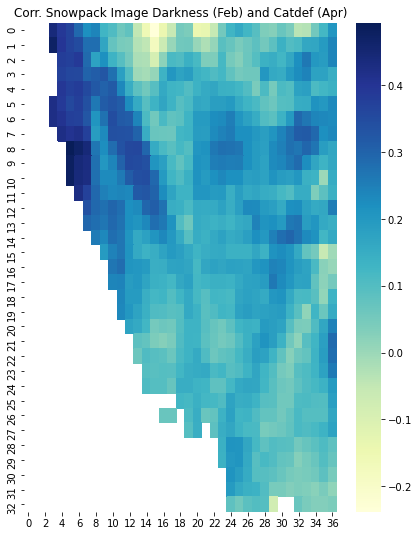

In [24]:
f, ax = plt.subplots(figsize=(7,9))
ax = sns.heatmap(catdef_corr, cmap="YlGnBu")
plt.title("Corr. Snowpack Image Darkness (Feb) and Catdef (Apr)")
print()

### Runoff Correlations Plot
 - Each gridpoint is a correlation between that point's april measurements for runoff, and feb measurements of % image that is black pixels

In [26]:
runoff_corr = get_corrs(df['runoff_flat'], 'percent_image_black')
print(len(runoff_corr))
runoff_corr = runoff_corr.reshape(33,37)

1221


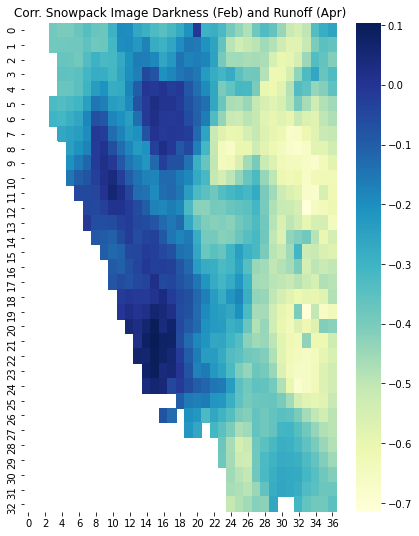

In [28]:
f, ax = plt.subplots(figsize=(7,9))
ax = sns.heatmap(runoff_corr, cmap="YlGnBu")
plt.title("Corr. Snowpack Image Darkness (Feb) and Runoff (Apr)")
print()